In [1]:
from extract import SocialETL, construct_query_for_twarc, extract_tags, SocialDB, UserETL
import hashtags as h
import hashtags_readcsv as r_csv
import pandas as pd
import numpy as np
import json
import statistics
import networkx as nx
from numpy import nan

# 1) Download DF

In [2]:
#modifiche: cambiare data e togliere lang eng
m = SocialETL(query="(#covid OR #pridemonth OR #grammys OR #justiceforjohnnydepp OR #putin OR #russia OR #ukraine OR #war)", pages=1, recent=False) #strangerthings4 

Output()

## creazione df_base

In [3]:
user_id=m.df['author_id'] 
set_user=set(user_id)
#un utente può aver fatto più di un tweet, in questo modo andiamo a vedere i suoi ultimi tweet solo una volta.
print(len(set_user))

96


In [4]:
hashtag_for_user={}
tweet_for_user={}
retweet_for_user={}
conversation_for_user={}
verified_for_user={}
location_for_user={}

for e in set_user:                                                             #1 pages=20 tweet   
    u=UserETL(e,pages=1)                                                       #aggiungere più pagine (1pag=20)
    #preprocessing hashtag
    u.df=u.df.dropna(subset=['entities.hashtags'])                             #drop nan values on column hashtags
    u.df.reset_index()
    u.df['entities.hashtags']=u.df['entities.hashtags'].apply(eval)            #convert into dict
    u.df["entities.hashtags"] = u.df["entities.hashtags"].map(h.extract_tags)  #extract tags
    hashtag_for_user[e]=u.df["entities.hashtags"].tolist()                     #convert pandas series into a list
    #preprocessing other attributes
    u.df=u.df.dropna(subset=['retweeted_user_id'])
    retweet_for_user[e]=u.df['retweeted_user_id'].tolist()
    conversation_for_user[e]=u.df['conversation_id'].tolist()
    tweet_for_user[e]=u.df['id'].tolist() 
    location_for_user[e]=u.df['author.location'].tolist()
    verified_for_user[e]=u.df['author.verified']

Output()

C:\Users\david\AppData\Local\Temp\ipykernel_8356\382585910.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u.df['entities.hashtags']=u.df['entities.hashtags'].apply(eval)            #convert into dict
C:\Users\david\AppData\Local\Temp\ipykernel_8356\382585910.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u.df["entities.hashtags"] = u.df["entities.hashtags"].map(h.extract_tags)  #extract tags


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [171]:
user_id=[]
tweet_id=[]
hashtag=[]
retweet=[]
location=[]
verified=[]
conversation=[]
for u,h in hashtag_for_user.items():
    user_id.append(u)
    hashtag.append(h)
for u,t in tweet_for_user.items():
    tweet_id.append(t)
for u,r in retweet_for_user.items():
    retweet.append(r)
for u,l in location_for_user.items():
    nest_loc=[]
    for loc in l:
        if str(loc)!='nan':
            nest_loc.append(loc)
        else:
            nest_loc.append('no_loc')
    location.append(nest_loc)
    
for u,v in verified_for_user.items():
    verified.append(v)
for u,c in conversation_for_user.items():
    conversation.append(c)

In [172]:
#create a pandas dataframe
df_nodes=pd.DataFrame({"user_id":user_id,
                       'tweet_id':tweet_id,
                      'retweet_id': retweet,
                       'conversation_id':conversation,
                      "hashtag":hashtag,
                     'location':location,
                     'verified':verified})

In [15]:
#df_1.to_csv('df_1')
df_nodes=pd.read_csv('4438_users_csv')

In [16]:
del df_nodes['Unnamed: 0']

In [17]:
df_nodes.set_index('user_id',inplace=True)

In [18]:
df_nodes

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
632276693,"['1556006364446695426', '1552334974904217601',...","['1541086591229231104', '1290441690', '6205320...","[['onepiece', 'onepiecefilmred'], ['dbacks'], ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0 False\n5 False\n45 False\n49 F...
2386380738,"['1556006077413871616', '1556005694352261120',...","['1131816228274692096', '188233441', '19894908...","[[''], ['', ''], ['', ''], ['', '', 'sabakan',...","['DISH//だし！放送地域𓌉◯𓇋 \u200e', 'DISH//だし！放送地域𓌉◯𓇋 ...",0 False\n1 False\n2 False\n3 F...
731210404823740417,"['1556010727609081858', '1556010704930578433',...","['606254342', '606254342', '1891490382', '1891...","[['mariupol'], ['ukraina'], ['russian', 'nikop...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0 False\n1 False\n8 False\n9 F...
314157950,"['1556003758617907210', '1556003704419008512',...","['298677835', '1475688399801569281', '14841100...","[['cumex'], ['nationalhymne'], ['ichhabemitgem...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0 False\n2 False\n6 False\n12 F...
27542573,"['1556009144418705409', '1556009107127242752',...","['1373371839062347785', '1373371839062347785',...","[['gazaunderattack'], ['gazaunderattack'], ['g...","['São Paulo, Brazil', 'São Paulo, Brazil', 'Sã...",0 False\n1 False\n2 False\n3 F...
...,...,...,...,...,...
793071405965475841,"['1556007375416467456', '1556007257766338560',...","['1295405245011460096', '520690173', '60512613...","[['breaking', 'gaza', 'palestine'], ['gazaunde...","['England, United Kingdom', 'England, United K...",2 False\n3 False\n7 False\n10 F...
2275138549,"['1556003709657686016', '1555978549554810882',...","['1495480590572961792', '934810674450059265', ...","[['ukraine'], ['ukrainerussiawar'], ['zaporizh...","['Ucraina', 'Ucraina', 'Ucraina', 'Ucraina', '...",0 False\n2 False\n11 False\n35 F...
1157318905930457090,"['1556010797603516416', '1555866823043690498',...","['198949082', '1474276996394123266', '26565820...","[['imax', 'op_filmred', 'onepiece', 'shanks', ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0 False\n1 False\n2 False\n3 F...


In [19]:
df_nodes['hashtag']=df_nodes['hashtag'].map(str).apply(eval)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(str).apply(eval)
#df_nodes['conversation_id']=df_nodes['conversation_id'].map(str).apply(eval)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(str).apply(eval)
#df_nodes['location']=df_nodes['location'].map(str).apply(eval)
#df_nodes['verified']=df_nodes['verified'].map(str).apply(eval)

## preprocessing 

In [20]:
#convert nested lists on set
def to_sets(nested_lists): 
    outer_list = set()
    for el in nested_lists: 
        if type(el) == list: 
            outer_list.update(el) 
        else: 
            outer_list.add(el)
    return outer_list

In [22]:
df_nodes['hashtag']=df_nodes['hashtag'].map(to_sets)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(to_sets)
#df_nodes['conversation_id']=df_nodes['conversation_id'].map(to_sets)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(to_sets)
df_nodes['verified']=df_nodes['verified'].map(to_sets)
df_nodes['location']=df_nodes['location'].map(to_sets)

In [23]:
df_nodes.head(3)

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
632276693,"{1520214182503010305, 1525200048035966976, 153...","{1357306193618685955, 62053208, 19627458, 1134...","{dbacks, suns, onepieceodyssey, onepiece1053sp...","{,, ], [, , a, n}","{4, 6, i, 7, a, t, 9, \n, 8, h, m, N, 0, ., v,..."
2386380738,"{1549561457192615936, 1556005034667945984, 155...","{328796794, 883142089168404481, 485398555, 147...","{, sabakan, kp813, tohocokemix, vs, toho, dish...","{𓌉, I, ◯, ], 地, H, し, 送, S, 放, 域, 0, だ, \, ', ...","{4, 6, i, 7, a, g, t, n, 9, \n, 8, h, m, N, 0,..."
731210404823740417,"{1553521219055620096, 1551664563090849798, 155...","{1891490382, 1497162777944862746, 380648579, 8...","{ukrainiane, lviv, kryvorizky, armukrainenow, ...","{,, ], [, , a, n}","{4, 6, i, 7, a, t, 9, \n, 8, h, m, N, 0, ., v,..."


In [24]:
df_nodes.shape

(4438, 5)

In [25]:
#df_nodes.to_csv('df_nodes')

# 2) Categorizzazione utenti

In [26]:
with open('hashtags_300.json', 'r') as f:
    my_dict = json.load(f)

In [27]:
proukr=set()
prorus=set()
pax=set()
for k,v in my_dict.items():
    for e in v:
        if k=='proukr':
            proukr.update(e)
        elif k=='pax':
            pax.update(e)
        elif k=='prorus':
            prorus.update(e)

In [28]:
cat=set.union(proukr,prorus,pax)
count1=0
count4=0
index1=[]
index4=[]

for i, row in enumerate(df_nodes['hashtag']): 
    if row.intersection(cat)==set():#no intersezione   
        #print(row.intersectionn(cat))
        #print("l'utente {}  appartiene alla 4 categoria".format(row.intersection(cat)))
        #print("4 categoria", row)
        count4 += 1
        index4.append(df_nodes.index[i])
        
    else: #c'è intersezione: uno della 3 categorie
        #print("non è la 4 categoria perchè contiene",row.intersection(cat))
       # if row.intersection(proukr)!=set(): #c'è intersez con proukr
            count1 += 1
            index1.append(i) #aggiungo alle rige da tgliere
            print("l'utente {} non  appartiene alla 4 categoria perchè usa {}".format(df_nodes.index[i],row.intersection(cat)))

l'utente 2386380738 non  appartiene alla 4 categoria perchè usa {'nftgiveaway'}
l'utente 731210404823740417 non  appartiene alla 4 categoria perchè usa {'lviv', 'armukrainenow', 'zelenskyy', 'mariupol', 'ukrainewar', 'ukrainerussianwar', 'ukrainerussiawar', 'stoprussianow', 'russiaisaterrorisstate', 'russianwarcrimes', 'mykolaiv', 'donetsk', 'ukraina', 'russia', 'ukrainian', 'himars', 'melitopol', 'kherson', 'dnipropetrovsk', 'ukrainianarmy', 'russians', 'ukraine', 'ukrainewillwin', 'nikopol', 'kramatorsk', 'kyiv', 'russian', 'odessa', 'chernobaevka', 'russiaisateroriststate', 'ukrainians', 'luhansk', 'kharkiv'}
l'utente 314157950 non  appartiene alla 4 categoria perchè usa {'fdp', 'switzerland', 'schroeder', 'wef', 'berlin', 'deutschland', 'faeser', 'selenskyj', 'putin', 'afd', 'israel', 'lamprecht'}
l'utente 27542573 non  appartiene alla 4 categoria perchè usa {'ukraine', 'russia'}
l'utente 1375905398503378945 non  appartiene alla 4 categoria perchè usa {'nato', 'russia', 'ukraine', 

l'utente 755841191615336448 non  appartiene alla 4 categoria perchè usa {'ukraine', 'mothersday'}
l'utente 152746136 non  appartiene alla 4 categoria perchè usa {'ukraine', 'standwithukraine', 'ukrainian'}
l'utente 4615108937 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 856605210961223680 non  appartiene alla 4 categoria perchè usa {'breaking', 'poland', 'ukrainerussiawar', 'tank', 'uav', 'turkey', 'donetsk', 'himars', 'russia', 'us', 'bmp', 'kherson', 'ukraine', 'donbas', 'israel', 'javelin', 'afghanistan', 'artillery', 'zaporizhzhia', 'grain', 'mig29', 'mlrs', 'kharkiv'}
l'utente 4698406153 non  appartiene alla 4 categoria perchè usa {'america', 'russia', 'syria', 'ukraine', 'usa', 'iraq', 'journalist', 'lebanon', 'israel', 'bbc', 'humanrights', 'news'}
l'utente 1355192423346012165 non  appartiene alla 4 categoria perchè usa {'covid19', 'france', 'covid', 'rip', 'media', 'paris', 'macron', 'israel', 'covid_19'}
l'utente 1327305255567155206 non  appartiene alla 4 c

l'utente 1149920097357717504 non  appartiene alla 4 categoria perchè usa {'repentance', 'wef', 'politics', 'india', 'warcrimes', 'russia', 'ukraine', 'knowyourenemy', 'us', 'climatecrisis', 'slavaukraini', 'staysafe', 'thegreatchurning'}
l'utente 741222793740619776 non  appartiene alla 4 categoria perchè usa {'gamedev', 'turkey'}
l'utente 1230710839071526912 non  appartiene alla 4 categoria perchè usa {'israel', 'ukraine', 'taiwan', 'humanrights'}
l'utente 1468512619757768704 non  appartiene alla 4 categoria perchè usa {'ukraine', 'taiwan'}
l'utente 33470425 non  appartiene alla 4 categoria perchè usa {'ol', 'gas', 'ukraine', 'hitzewelle', 'europa', 'climate', 'energie', 'hitze', 'habeck'}
l'utente 18574860 non  appartiene alla 4 categoria perchè usa {'covid', 'roevswade', 'covid19'}
l'utente 1425366198103982087 non  appartiene alla 4 categoria perchè usa {'taiwan', 'turkiye', 'standwithukraine', 'un', 'turkey', 'gas', 'russia', 'japan', 'us', 'kiev', 'kosovo', 'france', 'serbia', 'ukr

l'utente 4691720372 non  appartiene alla 4 categoria perchè usa {'wearenato', 'history', 'ukrainerussianwar', 'foodfighters', 'stpetersburg', 'nazi', 'wearenafo', 'russia', 'japan', 'aviation', 'russians', 'ukraine', 'wwii', 'ukrainewillwin', 'estonia', 'chefsforukraine', 'slavaukraini', 'israel', 'russian', 'genozid', 'nato', 'strongertogether'}
l'utente 1496663501795901444 non  appartiene alla 4 categoria perchè usa {'finland', 'warcrimes', 'ukraina', 'russia', 'ukraine', 'venaja', 'donbas', 'nato', 'sweden', 'turpo', 'russian', 'suomi', 'sakpol'}
l'utente 1052028205153091586 non  appartiene alla 4 categoria perchè usa {'nature', 'naturephotography'}
l'utente 555001150 non  appartiene alla 4 categoria perchè usa {'italia', 'draghi', 'russia', 'salvini', 'donbas', 'meloni', 'ucraina'}
l'utente 1295743647799848961 non  appartiene alla 4 categoria perchè usa {'z'}
l'utente 4642875015 non  appartiene alla 4 categoria perchè usa {'france', 'onu'}
l'utente 1300873020903510017 non  appartie

l'utente 2546330804 non  appartiene alla 4 categoria perchè usa {'covid', 'books', 'staysafe'}
l'utente 2235927172 non  appartiene alla 4 categoria perchè usa {'israel', 'ukraine', 'us', 'terrorists'}
l'utente 1395417589820575751 non  appartiene alla 4 categoria perchè usa {'ukraine', 'un', 'taiwan', 'turkey'}
l'utente 1376211097 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 1452683502672023560 non  appartiene alla 4 categoria perchè usa {'saveukraine', 'ukrainearmy', 'russiaisaterroriststate', 'drawing', 'russiaisateroriststate', 'standwithukraine', 'painting', 'art', 'ukrainewar', 'ukraine', 'saveazovstal', 'ukrainewillwin', 'gamedev', 'russiaterroriststate'}
l'utente 1017000144515059712 non  appartiene alla 4 categoria perchè usa {'ukraine', 'russian'}
l'utente 2898121735 non  appartiene alla 4 categoria perchè usa {'eurovision'}
l'utente 1398013211115503622 non  appartiene alla 4 categoria perchè usa {'ukraine', 'ucl', 'lgbtqia'}
l'utente 1497655027166498825 non 

l'utente 1116832021446320128 non  appartiene alla 4 categoria perchè usa {'9'}
l'utente 235769468 non  appartiene alla 4 categoria perchè usa {'ukraine', 'nyc'}
l'utente 874680889866727424 non  appartiene alla 4 categoria perchè usa {'art', 'digitalart'}
l'utente 755388169433022464 non  appartiene alla 4 categoria perchè usa {'stoprussianaggression', 'armukrainenow', 'standwithukraine', 'terrorstateputin', 'slavaukraine', 'stopputinnow', 'stoprussianow', 'russiaisaterroriststate', 'russianwarcrimes', 'unbreakablelikeukraine', 'amnesty', 'fellas', 'russia', 'nafo', 'butcheristanisputlershome', 'scholz', 'russiaisaterrorriststate', 'ukraine', 'ukrainianspirit', 'ukrainewillwin', 'putinisawarcriminal', 'slavaukraini', 'russian', 'putinwarcrimes', 'selenskyjisahero', 'fakenews', 'putin', 'misstrauensvotum'}
l'utente 719108596 non  appartiene alla 4 categoria perchè usa {'motivation', 'covid19'}
l'utente 14715249 non  appartiene alla 4 categoria perchè usa {'fdp', 'schroeder', 'ukraine', 's

l'utente 125467653 non  appartiene alla 4 categoria perchè usa {'olenivka', 'stoprussianaggression', 'armukrainenow', 'standwithukraine', 'uaarmy', 'ukrainerussiawar', 'agnescallamardmustresign', 'russiaisaterroriststate', 'amnesty', 'russia', 'himars', 'ukrainian', 'russiawarcrimes', 'cdnpoli', 'ukraine', 'usa', 'russian', 'stopputin', 'ukrainewillresist', 'russiainvadedukraine', 'zaporizhzhia', 'eu', 'schroder', 'amnestyinternational'}
l'utente 1214236668581957637 non  appartiene alla 4 categoria perchè usa {'digitalart'}
l'utente 1442419588956708865 non  appartiene alla 4 categoria perchè usa {'nordstream2', 'taiwan', 'krieg', 'zib2', 'europa', 'apple', 'democracy', 'scholz', 'wef', 'ukraine', 'lambrecht', 'children', 'covid', 'grunen', 'spd', 'sanktionen', 'afd', 'russland', 'covid_19'}
l'utente 887670056859176962 non  appartiene alla 4 categoria perchè usa {'taiwan', 'europe', 'osint', 'france', 'covid', 'iran', 'amnesty', 'standwithukraine', 'russie', 'russia', 'ukrainian', 'ukra

l'utente 2935378023 non  appartiene alla 4 categoria perchè usa {'help', 'breaking', 'ukraine', 'ukrainerussiawar', 'israel'}
l'utente 1337202778222055427 non  appartiene alla 4 categoria perchè usa {'procreate', 'fortnite', 'digitalart'}
l'utente 1485425278402846725 non  appartiene alla 4 categoria perchè usa {'ukraine', 'russian', 'russia'}
l'utente 1552344891690213378 non  appartiene alla 4 categoria perchè usa {'nfts'}
l'utente 1503968931341557761 non  appartiene alla 4 categoria perchè usa {'ukraine', 'mykolaiv', 'agnescallamardmustresign'}
l'utente 3050433638 non  appartiene alla 4 categoria perchè usa {'neverforget', 'syria', 'nato', 'ukraine', 'eu', 'us', 'israel', 'idlib', 'stand4uyghurs'}
l'utente 1302670766131916801 non  appartiene alla 4 categoria perchè usa {'taiwan'}
l'utente 237277628 non  appartiene alla 4 categoria perchè usa {'ucraina', 'zelensky', 'zaporizhzhia', 'russia'}
l'utente 1497577711048474627 non  appartiene alla 4 categoria perchè usa {'izyum', 'standwithuk

l'utente 2804109824 non  appartiene alla 4 categoria perchè usa {'taiwan', 'sanctions', 'biden', 'turkey', 'guerra', 'amnesty', 'zelenskywarcriminal', 'russia', 'zelensky', 'meloni', 'ucraina', 'kiev', 'europe', 'ue', 'ukraine', 'donbass', 'warinukraine', 'nato', 'salvini', 'schroder', 'putin', 'amnestyinternational', 'erdogan'}
l'utente 1359121928066269184 non  appartiene alla 4 categoria perchè usa {'9'}
l'utente 806521045272428544 non  appartiene alla 4 categoria perchè usa {'india', 'gold', 'russia', 'helicopter', 'google', 'us', 'donate', 'afghanistan'}
l'utente 2720051267 non  appartiene alla 4 categoria perchè usa {'odessa', 'america', 'germany', 'russia', 'cia', 'ukraine', 'zelensky', 'us', 'lavrov', 'military', 'kiev'}
l'utente 1085280016320073731 non  appartiene alla 4 categoria perchè usa {'russia', 'ukraine', 'ukrainewillwin', 'us', 'monkeypox', 'genocide'}
l'utente 2649164186 non  appartiene alla 4 categoria perchè usa {'ger', 'agnesscallamardmustresign', 'agnescallamardmu

l'utente 1419774004068446216 non  appartiene alla 4 categoria perchè usa {'ethereum', 'opensea', 'nftcommunity', 'btc', 'nftartist', 'eth', 'crypto', 'nftart', 'nft', 'nftgiveaway', 'nfts', 'nftproject'}
l'utente 576275730 non  appartiene alla 4 categoria perchè usa {'stoprussianaggression', 'lgbtqia', 'armukrainenow', 'standwithukraine', 'russia', 'ukraine', 'israel', 'genocide', 'stopputin'}
l'utente 1352660903016206337 non  appartiene alla 4 categoria perchè usa {'painting'}
l'utente 1243514581 non  appartiene alla 4 categoria perchè usa {'taiwan', 'ue', 'russia', 'cronaca', 'salvini', 'zelensky', 'usa', 'ucraina', 'biden'}
l'utente 1530607321151422476 non  appartiene alla 4 categoria perchè usa {'art', 'beautiful'}
l'utente 2779241192 non  appartiene alla 4 categoria perchè usa {'twitter'}
l'utente 1554117026460958721 non  appartiene alla 4 categoria perchè usa {'russia', 'ukraine', 'zelensky', 'biden', 'kiev'}
l'utente 87624170 non  appartiene alla 4 categoria perchè usa {'researc

l'utente 444998380 non  appartiene alla 4 categoria perchè usa {'merkel', 'deutschland', 'kriegstreiber', 'ukraine', 'putin', 'nazis', 'erdogan', 'stopwar'}
l'utente 1432878138548232193 non  appartiene alla 4 categoria perchè usa {'putin'}
l'utente 3407918577 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 737428458 non  appartiene alla 4 categoria perchè usa {'russiaisaterrorisstate', 'russiaisaterroriststate', 'russianwarcrimes', 'europe', 'armukrainenow', 'mykolaiv', 'standwithukraine', 'mariupol', 'russia', 'ukrainian', 'ukraine', 'odesa', 'amnestyinternational', 'russian', 'kharkiv', 'horlivka'}
l'utente 859352124689219584 non  appartiene alla 4 categoria perchè usa {'ai', 'solidarity', 'india', 'muslim', 'ukraine', 'boxing'}
l'utente 17921374 non  appartiene alla 4 categoria perchè usa {'russia'}
l'utente 1501336922530136064 non  appartiene alla 4 categoria perchè usa {'ukrainewarnews', 'russia', 'ukraine', 'zelensky', 'ukrainewar', 'ukrainerussiawar', 'biden', '

l'utente 213878611 non  appartiene alla 4 categoria perchè usa {'standwithukraine', 'germany', 'breaking', 'belarus', 'agnesscallamardmustresign', 'un', 'agnescallamardmustresign', 'stoprussianow', 'steinmeier', 'amnesty', 'fellas', 'russia', 'ukrainian', 'genocide', 'scholz', 'kherson', 'ukrainianarmy', 'german', 'russians', 'ukraine', 'ukrainewillwin', 'putinisawarcriminal', 'russian', 'ukrainerussia', 'merkel', 'stoprussia', 'unsc', 'schroder'}
l'utente 60410054 non  appartiene alla 4 categoria perchè usa {'ukraine', 'borisjohnson'}
l'utente 1082568109628755968 non  appartiene alla 4 categoria perchè usa {'embraceukraine', 'covid', 'ue', 'stoprussia', 'zelensky', 'ucrania'}
l'utente 350437162 non  appartiene alla 4 categoria perchè usa {'moscow', 'politics', 'russia', 'ukraine', 'ukraineunderattack', 'voteblue', 'putin', 'demvoice1', 'stopputin'}
l'utente 1009335365436657664 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 903248555602837504 non  appartiene alla 4 ca

l'utente 1346088615336669187 non  appartiene alla 4 categoria perchè usa {'stoprussianaggression', 'standwithukraine', 'breaking', 'ukrainewar', 'ukrainerussianwar', 'ukrainerussiawar', 'agnescallamardmustresign', 'sevastopol', 'russiaisaterroriststate', 'russia', 'kharkov', 'ukrainian', 'zelensky', 'kherson', 'europe', 'ukrainianarmy', 'energy', 'ukraine', 'zaporizhzhya', 'russiaukrainewar', 'slavaukraini', 'russian', 'stoprussia', 'warinukraine', 'ukraineunderattack', 'ukrainians', 'putin', 'kharkiv', 'crimea'}
l'utente 109831308 non  appartiene alla 4 categoria perchè usa {'israel', 'ukraine', 'eu'}
l'utente 4871934887 non  appartiene alla 4 categoria perchè usa {'stockholm', 'armukrainenow', 'standwithukraine', 'un', 'bulgaria', 'georgia', 'russianwarcrimes', 'neverforget', 'stpetersburg', 'wearenafo', 'nafo', 'russia', 'paris', 'ukrainian', 'us', 'himars', 'kherson', 'europe', 'ukrainianarmy', 'actforukraine', 'tbilisi', 'ukraine', 'usa', 'ukrainewillwin', 'slavaukraini', 'russian

l'utente 1495019965774450688 non  appartiene alla 4 categoria perchè usa {'catsoftwitter', 'taiwan', 'cats', 'russiaukraine', 'guerra', 'standwithukraine', 'invasion', 'ukrainewar', 'ukraine', 'ukrainerussiawar', 'ucrania', 'catlover'}
l'utente 855198062024806401 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 49286622 non  appartiene alla 4 categoria perchè usa {'ukraine', 'stand4uyghurs'}
l'utente 1184395698600665089 non  appartiene alla 4 categoria perchè usa {'btc', 'eth', 'crypto', 'digitalasset', 'cryptocurrency'}
l'utente 1478110519261282306 non  appartiene alla 4 categoria perchè usa {'twitter'}
l'utente 306684227 non  appartiene alla 4 categoria perchè usa {'covid', 'thankyou', 'monkeypox', 'oscars'}
l'utente 1552169921303482369 non  appartiene alla 4 categoria perchè usa {'hope', 'kherson', 'ukraineunderattak', 'standwithukraine', 'tiktok', 'russia', 'ukrainian', 'ukraine', 'nato', 'russiaterroriststate', 'ukrainerussiawar', 'saveazovstaldefenders', 'russian'

l'utente 1503328826968915975 non  appartiene alla 4 categoria perchè usa {'putin', 'nazis', 'cdnpoli', 'freedom'}
l'utente 1312290184566898689 non  appartiene alla 4 categoria perchè usa {'drone', 'drones', 'warinukraine', 'standwithukraine', 'ukraine', 'ukrainewar', 'aerorozvidka', 'war', 'standwithukriane'}
l'utente 856919149850882049 non  appartiene alla 4 categoria perchè usa {'propaganda', 'fdp', 'vogue', 'schroeder', 'startup', 'ukraine', 'putin', 'habeck'}
l'utente 1646145848 non  appartiene alla 4 categoria perchè usa {'orban', 'democrats', 'wtpblue', 'voteblue2022', 'potus', 'nazi', 'democracy', 'usa', 'voteblue', 'texas', 'biden', 'putin', 'demvoice1', 'lgbtq', 'trublue'}
l'utente 773098011341664256 non  appartiene alla 4 categoria perchè usa {'ethereum', 'nftcommunity', 'eth', 'crypto', 'nft', 'nftgiveaway', 'nfts'}
l'utente 4523206341 non  appartiene alla 4 categoria perchè usa {'newprofilepic', 'ukraine', 'stand4uyghurs'}
l'utente 325051829 non  appartiene alla 4 categoria

l'utente 1495863476937535502 non  appartiene alla 4 categoria perchè usa {'mykolaiv', 'nazirussia', 'standwithukraine', 'russia', 'ukraine', 'ucraina', 'amnestyinternational', 'agnescallamardmustresign'}
l'utente 740195352079392768 non  appartiene alla 4 categoria perchè usa {'kiew', 'pentagon', 'marsii', 'waffenlieferungen', 'euro', 'frankfurt', 'deutschland', 'gas', 'himars', 'ucl', 'panzern', 'ukraine', 'usa', 'israel', 'moskau', 'twitter', 'nato', 'eu', 'sanktionen', 'russland', 'putin', 'gold'}
l'utente 1494827491675951106 non  appartiene alla 4 categoria perchè usa {'nftcommunity', 'btc', 'ad', 'eth', 'crypto', 'nft', 'metaverse', 'cryptocurrency', 'nftgiveaway', 'nfts'}
l'utente 613083415 non  appartiene alla 4 categoria perchè usa {'ukraine', 'lgbt', 'artistsontwitter'}
l'utente 1554366010160922624 non  appartiene alla 4 categoria perchè usa {'children', 'europeanunion', 'europe', 'france', 'germany', 'ukraine', 'usa', 'italy', 'israel'}
l'utente 94690132 non  appartiene alla 4

l'utente 1031872425011671040 non  appartiene alla 4 categoria perchè usa {'taiwan', 'russianwarcrimes', 'armukrainenow', 'standwithukraine', 'nazirussia', 'russia', 'ukraine', 'putinhitler', 'russland', 'putin'}
l'utente 770656270986645506 non  appartiene alla 4 categoria perchè usa {'kyiv', 'ukraine', 'kharkiv', 'himars'}
l'utente 226201402 non  appartiene alla 4 categoria perchè usa {'ukraine', 'armukrainenow', 'karma', 'ukrainian'}
l'utente 1469971458365480961 non  appartiene alla 4 categoria perchè usa {'turquie', 'zaporizhzhia', 'taiwan', 'russianwarcrimesinukraine', 'donetsk', 'poutine', 'russie', 'ukraine', 'azov', 'ukrainians', 'donbass', 'israel', 'armenie', 'russian', 'erdogan'}
l'utente 1545249705319211008 non  appartiene alla 4 categoria perchè usa {'ukraine', 'russia'}
l'utente 1201470878959198209 non  appartiene alla 4 categoria perchè usa {'fdp', 'kriegsverbrecher', 'krieg', 'deutschland', 'iran', 'nato', 'ukraine', 'eu', 'monkeypox', 'russland', 'israel', 'selenskyj'}
l

l'utente 928635706167132160 non  appartiene alla 4 categoria perchè usa {'europe', 'russes', 'ukraine', 'moscou', 'taiwanisnotchina', 'monkeypox', 'israel', 'amnestyinternational', 'energie'}
l'utente 210787407 non  appartiene alla 4 categoria perchè usa {'israel', 'reuters', 'ukraine'}
l'utente 352642644 non  appartiene alla 4 categoria perchè usa {'migranti', 'draghi', 'ukraine', 'donbas', 'meloni'}
l'utente 712529343503851520 non  appartiene alla 4 categoria perchè usa {'artist'}
l'utente 1533987602524962817 non  appartiene alla 4 categoria perchè usa {'indie', 'gamedev'}
l'utente 1548061622026903555 non  appartiene alla 4 categoria perchè usa {'btc', 'eth', 'crypto', 'nft', 'nfts'}
l'utente 1450906673976119298 non  appartiene alla 4 categoria perchè usa {'europe', 'covid19', 'france', 'macron', 'ukrainewar', 'zelensky', 'ukrainerussianwar', 'ukraine', 'guerreenukraine', 'biden', 'israel'}
l'utente 1527457156072722454 non  appartiene alla 4 categoria perchè usa {'trending', 'ethereu

l'utente 93878848 non  appartiene alla 4 categoria perchè usa {'krieg', 'amnesty', 'eurovision', 'nato', 'google', 'ukraine', 'angriffskrieg', 'europa', 'russland', 'putin', 'un', 'odessa', 'habeck'}
l'utente 2871691997 non  appartiene alla 4 categoria perchè usa {'ad'}
l'utente 1004227364 non  appartiene alla 4 categoria perchè usa {'scholz', 'fdp', 'grune', 'gazprom', 'guterres', 'gas', 'tempolimit', 'ukraine', 'hitzewelle', 'spd', 'eu', 'letztegeneration', 'habeck'}
l'utente 932216721481625600 non  appartiene alla 4 categoria perchè usa {'ukraine', 'kosovo', 'rusia', 'serbia'}
l'utente 1104714325514571776 non  appartiene alla 4 categoria perchè usa {'ucl'}
l'utente 792633114128416768 non  appartiene alla 4 categoria perchè usa {'russianwarcrimes', 'ukrainianarmy', 'standwithukraine', 'mariupol', 'ukraine', 'russiaukrainewar', 'russiaterroriststate', 'ukrainerussiawar', 'amnestyinternational', 'russianukrainianwar'}
l'utente 3484575387 non  appartiene alla 4 categoria perchè usa {'az

l'utente 3661684775 non  appartiene alla 4 categoria perchè usa {'canada', 'putinwarcriminal', 'generalelectionnow', 'standwithukraine', 'germany', 'mariupol', 'ukrainewar', 'ukrainerussiawar', 'turpo', 'war', 'agnescallamardmustresign', 'sakpol', 'freeukraine', 'russiaisaterrorisstate', 'costoflivingcrisis', 'russianwarcrimes', 'russiaisaterroriststate', 'fellas', 'anonymous', 'russia', 'enoughisenough', 'genocideofukrainians', 'ukraine', 'estonia', 'kyiv', 'slavaukraini', 'oprussia', 'toriesunfittogovern', 'russiaisateroriststate', 'torycostoflivingcrisis', 'ukraineunderattack'}
l'utente 1324315079878320128 non  appartiene alla 4 categoria perchè usa {'onev1', 'ohio', 'buffalo', 'bidenharris', 'blacklivesmatter', 'wtpblue', 'voteblue2022', 'roethevote', 'istandwithukraine', 'russia', 'ukraine', 'texas', 'demvoice1', 'democracy', 'humanrights', 'blm'}
l'utente 458841339 non  appartiene alla 4 categoria perchè usa {'israel', 'ukraine', 'syria'}
l'utente 1275667762346708993 non  apparti

l'utente 1549943306112606208 non  appartiene alla 4 categoria perchè usa {'kherson', 'taiwan', 'russiaisateroriststate', 'serbia', 'euro2022', 'weuro2022', 'helicopter', 'bornpink', 'ukrainewillwin', 'ukraine', 'ukrainerussiawar', 'israel', 'russianarmy', 'kosovo'}
l'utente 34758853 non  appartiene alla 4 categoria perchè usa {'blacklivesmatter', 'russia', 'ukraine', 'artistsontwitter', 'water'}
l'utente 633148791 non  appartiene alla 4 categoria perchè usa {'standwithukraine', 'stopputin', 'russia', 'russians', 'ukraine', 'ukrainewar', 'kremlin', 'kyiv', 'putin', 'odessa', 'agnescallamardmustresign', 'stoprussianow'}
l'utente 2221644199 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 3108963125 non  appartiene alla 4 categoria perchè usa {'ukraine', 'ukr', 'taiwan', 'russia'}
l'utente 1502917823353573381 non  appartiene alla 4 categoria perchè usa {'taiwan', 'breaking', 'crypto', 'borisjohnson', 'quote', 'war', 'nancypelosi', 'democracy', 'globalwarming', 'ukraine', '

l'utente 1010851224453775360 non  appartiene alla 4 categoria perchè usa {'turquie', 'eurovision', 'russie', 'gamedev', 'onu', 'nature'}
l'utente 1509772403391483912 non  appartiene alla 4 categoria perchè usa {'azovstal', 'russiaisaterrorisstate', 'russiaisaterroriststate', 'stoprussia', 'armukrainenow', 'russians', 'kharkov', 'ukraine', 'ukrainian', 'ukrainewar', 'saveazovstal', 'genocide'}
l'utente 1428483832928358403 non  appartiene alla 4 categoria perchè usa {'truth', 'taiwan', 'architecture', 'ai', 'politics', 'reality', 'history', 'russia', 'poland', 'ukraine', 'nature', 'ukrainerussiawar', 'water', 'war', 'animals', 'military', 'africa', 'army'}
l'utente 189825485 non  appartiene alla 4 categoria perchè usa {'ukraine', 'iranian', 'us'}
l'utente 867307829484552193 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 1457329303100743686 non  appartiene alla 4 categoria perchè usa {'dogs', 'russiaisaterroriststate', 'adoptdontshop', 'standwithukraine', 'nazirussia', '

l'utente 898256958511304706 non  appartiene alla 4 categoria perchè usa {'oprussia', 'russiaisaterrorisstate', 'westandwithukraine', 'stoprussia', 'armukrainenow', 'patron', 'standwithukraine', 'ukraine', 'eu', 'slavaukrainii', 'russian'}
l'utente 281197628 non  appartiene alla 4 categoria perchè usa {'covid', 'usa', 'covid19'}
l'utente 4257642292 non  appartiene alla 4 categoria perchè usa {'covid', 'radio'}
l'utente 1004921084116897795 non  appartiene alla 4 categoria perchè usa {'ukraine', 'neverforget'}
l'utente 49342976 non  appartiene alla 4 categoria perchè usa {'russianukrainianwar', 'genocideofukrainians', 'russianwarcrimes', 'stoprussia', 'fellas', 'wearenafo', 'russia', 'nafo', 'ukraine', 'khersonisukraine', 'sweden', 'kosovo', 'amnestyinternational', 'karma', 'russian', 'stoprussianow'}
l'utente 249781697 non  appartiene alla 4 categoria perchè usa {'eurovision'}
l'utente 1438766360360796162 non  appartiene alla 4 categoria perchè usa {'ukraine', 'taiwan', 'stand4uyghurs'}


l'utente 1027697970710552576 non  appartiene alla 4 categoria perchè usa {'american', 'warcrimes', 'amnesty', 'azerbaijan', 'ukraine', 'pows', 'humanrights'}
l'utente 7455282 non  appartiene alla 4 categoria perchè usa {'propaganda', 'pentagon', 'cancer', 'taiwan', 'sanctions', 'assad', 'germany', 'breaking', 'brics', 'russianarmy', 'military', 'crimesagainsthumanity', 'european', 'humanity', 'georgia', 'india', 'media', 'oil', 'russia', 'nazi', 'ukrainian', 'ukrainewarcrimes', 'us', 'japan', 'zaporizhia', 'terrorists', 'democracy', 'kherson', 'ukrainearmy', 'europe', 'northkorea', 'covid19', 'ukrainianarmy', 'wagnergroup', 'syria', 'ukraine', 'usa', 'donbass', 'russian', 'love', 'children', 'american', 'usdollar', 'xijinping', 'warcrimes', 'america', 'fakenews', 'iraq', 'monkeypox', 'putin'}
l'utente 1556706691 non  appartiene alla 4 categoria perchè usa {'helpukraine', 'armukrainenow', 'unitedwithukraine', 'standwithukraine', 'wearenafo', 'bakhmut', 'ukraine', 'slavaukrayini', 'sever

l'utente 856206400900530177 non  appartiene alla 4 categoria perchè usa {'rusia', 'france', 'terrorism', 'crisis', 'paris', 'ukraine', 'israel', 'karma'}
l'utente 1065122359785414656 non  appartiene alla 4 categoria perchè usa {'opensea', 'nftartist', 'crypto', 'nftcollectors', 'nftcollections', 'ethereum', 'nftcommunity', 'btc', 'eth', 'nftcommmunity', 'nftgiveaway', 'nftcollector', 'nftproject', 'usdt', 'ad', 'community', 'metaverse', 'nftcommumity', 'nftart', 'nft', 'nfts'}
l'utente 25676606 non  appartiene alla 4 categoria perchè usa {'taiwan', 'covid', 'draghi', 'gas', 'elezioni2022', 'salvini', 'meloni', 'ucraina', 'biden', 'news'}
l'utente 311421566 non  appartiene alla 4 categoria perchè usa {'video', 'trending', 'macron', 'life', 'ukraine', 'israel', 'news'}
l'utente 1203153399266459649 non  appartiene alla 4 categoria perchè usa {'courage', 'pentagon', 'taiwan', 'joebiden', 'potus', 'breaking', 'cia', 'foxnews', 'uk', 'biden', 'reuters', 'blog', 'un', 'president', 'military',

l'utente 279426237 non  appartiene alla 4 categoria perchè usa {'wef', 'covid19', 'zelenskywarcriminal', 'russia', 'ukraine', 'co', 'oekraine'}
l'utente 1151139523604156416 non  appartiene alla 4 categoria perchè usa {'democrats', 'ukraine', 'monkeypox', 'wikipedia', 'afghanistan', 'hollywood'}
l'utente 2477246450 non  appartiene alla 4 categoria perchè usa {'israel', 'ukraine', 'zelenskywarcriminal'}
l'utente 762442051 non  appartiene alla 4 categoria perchè usa {'rusia', 'twitter', 'covid19', 'invasion', 'putin', 'ucrania', 'erdogan'}
l'utente 1417040739981316097 non  appartiene alla 4 categoria perchè usa {'frexit', 'covid', 'macron', 'ukrainewar', 'zelensky', 'amnestyinternational'}
l'utente 706157451041570818 non  appartiene alla 4 categoria perchè usa {'summer'}
l'utente 53232669 non  appartiene alla 4 categoria perchè usa {'ukraine', 'ukrainerussiawar'}
l'utente 1117571358689460226 non  appartiene alla 4 categoria perchè usa {'draw'}
l'utente 127482427 non  appartiene alla 4 cat

l'utente 3307396007 non  appartiene alla 4 categoria perchè usa {'ynwa', 'zelenskywarcriminal', 'ukraine', 'ukrainerussiawar', 'israel'}
l'utente 2988834243 non  appartiene alla 4 categoria perchè usa {'art', 'drawing'}
l'utente 533042963 non  appartiene alla 4 categoria perchè usa {'breakingnews', 'ukraine'}
l'utente 828320209593184256 non  appartiene alla 4 categoria perchè usa {'ukraine', 'russia'}
l'utente 1521144146559442948 non  appartiene alla 4 categoria perchè usa {'propaganda', 'azovstal', 'turkiye', 'standwithukraine', 'azov', 'rusya', 'ukrainerussiawar', 'war', 'news', 'ukrayna', 'russia', 'ukrainian', 'bayraktar', 'krm', 'western', 'bayraktartb2', 'crimeaisukraine', 'ukraine', 'donbas', 'russian', 'fakenews', 'putin'}
l'utente 1515327353488134148 non  appartiene alla 4 categoria perchè usa {'frexit', 'covid', 'russie', 'macron', 'ukraine', 'usa'}
l'utente 1528453694072754185 non  appartiene alla 4 categoria perchè usa {'nftcollections', 'ukraine', 'nftart', 'ukrainian', 'n

l'utente 1496879839667752960 non  appartiene alla 4 categoria perchè usa {'warcrimes', 'wearenafo', 'nafo', 'russia', 'ukraine', 'urbanwarfare', 'ukrainewillwin', 'amnestyinternational', 'agnescallamardmustresign'}
l'utente 1326671816472014849 non  appartiene alla 4 categoria perchè usa {'twitter', 'taiwan', 'covid', 'poutine', 'zelensky', 'zelenski'}
l'utente 1495552921181827073 non  appartiene alla 4 categoria perchè usa {'europe', 'churchill', 'france', 'donetsk', 'ukraine', 'zelensky', 'youtube', 'donbass'}
l'utente 849675806 non  appartiene alla 4 categoria perchè usa {'ukraine', 'warcrimes', 'afghanistan', 'stand4uyghurs'}
l'utente 245089419 non  appartiene alla 4 categoria perchè usa {'amnesty', 'ukraina', 'russia', 'ukraine', 'ukrainewillwin', 'estonia'}
l'utente 952294580095012864 non  appartiene alla 4 categoria perchè usa {'lgbt', 'europe', 'france', 'macron', 'portugal', 'covid_19'}
l'utente 1551051278524026883 non  appartiene alla 4 categoria perchè usa {'artgallery', 'ope

l'utente 281669464 non  appartiene alla 4 categoria perchè usa {'terrorist', 'russiaisateroriststate', 'assad', 'standwithukraine', 'poutine', 'tiktok', 'russia', 'syria', 'ukraine', 'putin', 'russian', 'stoprussianow'}
l'utente 2697123192 non  appartiene alla 4 categoria perchè usa {'russiaisaterrorisstate', 'russiaisaterroriststate', 'europe', 'history', 'russiaisaterrorriststate', 'ynwa', 'family', 'syria', 'peace', 'ukraine', 'usa', 'ukrainerussiawar'}
l'utente 1512228198800629762 non  appartiene alla 4 categoria perchè usa {'nfts', 'crypto'}
l'utente 378250583 non  appartiene alla 4 categoria perchè usa {'kherson', 'olenivka', 'standwithukraine', 'mariupol', 'russia', 'ukrainewar', 'ukrainian', 'azov', 'ukrainerussianwar', 'russians', 'ukrainerussiawar', 'ukraine', 'ukrainewillwin', 'russiaterroriststate', 'russian', 'crimea'}
l'utente 1224118969545580544 non  appartiene alla 4 categoria perchè usa {'twitter'}
l'utente 1549233894335062016 non  appartiene alla 4 categoria perchè us

l'utente 1414968198814965765 non  appartiene alla 4 categoria perchè usa {'armukrainenow', 'amnesty', 'russia', 'ukraine', 'amnestyinternational'}
l'utente 134119443 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 4825382055 non  appartiene alla 4 categoria perchè usa {'eurovision'}
l'utente 1535907562306129920 non  appartiene alla 4 categoria perchè usa {'indie', 'fortnite', 'ad', 'gamedev', 'nft', 'war'}
l'utente 818080661697392640 non  appartiene alla 4 categoria perchè usa {'covid', 'staysafe'}
l'utente 1216391405045600256 non  appartiene alla 4 categoria perchè usa {'children', 'american', 'covid', 'democracy', 'america', 'globalwarming', 'foxnews', 'jew', 'biden', 'nazis', 'lgbtq', 'hollywood'}
l'utente 2257702388 non  appartiene alla 4 categoria perchè usa {'twitter', 'summer'}
l'utente 2390896625 non  appartiene alla 4 categoria perchè usa {'armukrainenow', 'patron', 'standwithukraine', 'wearenafo', 'ukraine', 'ukrainerussiawar'}
l'utente 1305865621880569856 no

l'utente 2289978324 non  appartiene alla 4 categoria perchè usa {'putin'}
l'utente 1288983578936782848 non  appartiene alla 4 categoria perchè usa {'bbc', 'onlyfans', 'tiktok'}
l'utente 1544040184773091328 non  appartiene alla 4 categoria perchè usa {'russiainvadedukraine', 'russianwarcrimes', 'ukrainewillwin', 'russiaterroriststate', 'putin', 'agnesscallamardmustresign'}
l'utente 889015269531824128 non  appartiene alla 4 categoria perchè usa {'russia', 'ukraine', 'ukrainian', 'ukrainewillwin', 'putin', 'russian'}
l'utente 1506768457240563717 non  appartiene alla 4 categoria perchè usa {'germany', 'mariupol', 'ukrainewar', 'uk', 'azov', 'ukrainerussiawar', 'un', 'europeanunion', 'donetsk', 'russia', 'ukrainian', 'zelensky', 'scholz', 'zaporozhye', 'europe', 'ukrainianarmy', 'france', 'ukraine', 'caesar', 'usa', 'donbas', 'russian', 'ukrainerussia', 'warcrimes', 'nato', 'macron', 'eu', 'amnestyinternational'}
l'utente 432704122 non  appartiene alla 4 categoria perchè usa {'catsoftwitter

l'utente 95672590 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 562278262 non  appartiene alla 4 categoria perchè usa {'twitter', 'nftcommunity', 'btc', 'eth', 'crypto', 'community', 'telegram', 'nft', 'metaverse', 'cryptocurrency', 'nfts'}
l'utente 1549295558271111169 non  appartiene alla 4 categoria perchè usa {'nft', 'nftart', 'nfts'}
l'utente 740806233620402177 non  appartiene alla 4 categoria perchè usa {'tiktok'}
l'utente 1311215825081307136 non  appartiene alla 4 categoria perchè usa {'saitama'}
l'utente 1669821648 non  appartiene alla 4 categoria perchè usa {'nordstream2', 'kherson', 'taiwan', 'russiaisaterroriststate', 'europe', 'armukrainenow', 'standwithukraine', 'breaking', 'gas', 'russia', 'oil', 'ukraine', 'russian', 'us', 'eu', 'schroder', 'ukrainerussiawar', 'russianworld'}
l'utente 1400090043256016898 non  appartiene alla 4 categoria perchè usa {'ukrania', 'wildlife', 'taiwan', 'canada', 'ukrainewar', 'life', 'ukrainerussianwar', 'ukrainerussiawar', 

l'utente 902689690704367616 non  appartiene alla 4 categoria perchè usa {'propaganda', 'trumprussia', 'orban', 'antisemitism', 'russia', 'voteblue', 'texas', 'california'}
l'utente 344021462 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 2977076303 non  appartiene alla 4 categoria perchè usa {'unfoldtheuniverse'}
l'utente 1384945253363367939 non  appartiene alla 4 categoria perchè usa {'neverforget', 'iran', 'breaking', 'syria', 'ukraine', 'russiaukrainewar', 'israel'}
l'utente 1010240440514301952 non  appartiene alla 4 categoria perchè usa {'scholz', 'fdp', 'taiwan', 'turbine', 'zdf', 'belarus', 'ukraine', 'spd', 'italy', 'sanktionen', 'russland', 'putin', 'euro', 'habeck'}
l'utente 4192961459 non  appartiene alla 4 categoria perchè usa {'taiwan', 'russiaukraine', 'georgia', 'sanctions', 'standwithukraine', 'ukraine', 'biden', 'news'}
l'utente 1044900184252182529 non  appartiene alla 4 categoria perchè usa {'russiaisaterrorisstate', 'russianwarcrimes', 'stoprussia', 

l'utente 1089710815597547520 non  appartiene alla 4 categoria perchè usa {'propaganda', 'gazprom', 'wildlife', 'taiwan', 'sanctions', 'germany', 'wedding', 'breaking', 'family', 'house', 'crypto', 'biden', 'president', 'military', 'hollywood', 'news', 'inspiration', 'trending', 'australia', 'turbine', 'cats', 'turkey', 'kids', 'sumy', 'amnesty', 'media', 'gas', 'russia', 'ukrainian', 'zelensky', 'team', 'europe', 'france', 'politics', 'research', 'wagnergroup', 'ukraine', 'usa', 'jobs', 'nature', 'action', 'israel', 'updates', 'bike', 'humanrights', 'love', 'africa', 'books', 'children', 'hero', 'russian', 'video', 'soldiers', 'unitednations', 'covid', 'redcarpet', 'grain', 'live', 'follow', 'world', 'monkeypox', 'kremlin', 'breakingnews', 'putin'}
l'utente 32114121 non  appartiene alla 4 categoria perchè usa {'ukraineunderattak', 'stoprussia', 'nazirussia', 'standwithukraine', 'russia', 'ukraine', 'russiaukrainewar', 'kharkiv', 'agnescallamardmustresign'}
l'utente 2233129651 non  appa

l'utente 1453010365395124225 non  appartiene alla 4 categoria perchè usa {'genocideofukrainians', 'russianwarcrimes', 'stoprussia', 'armukrainenow', 'warcrimes', 'ukraine', 'khersonisukraine', 'ukrainerussiawar', 'russianukrainianwar', 'war', 'agnescallamardmustresign', 'stoprussianow'}
l'utente 1513977364505583620 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 250476893 non  appartiene alla 4 categoria perchè usa {'politics', 'america', 'tiktok', 'loser', 'putin', 'president', 'california'}
l'utente 835786237 non  appartiene alla 4 categoria perchè usa {'taiwan', 'lviv', 'potus', 'ukrainewar', 'odesa', 'ukrainerussiawar', 'biden', 'dnipro', 'turkey', 'adoptdontshop', 'russia', 'caturday', 'kiev', 'politics', 'ukraine', 'kyiv', 'climate', 'odessa', 'california', 'america', 'mykolayiv', 'bakhmut', 'nato', 'live', 'putin', 'kharkiv'}
l'utente 1548357205870534659 non  appartiene alla 4 categoria perchè usa {'australia', 'cancer', 'canada', 'trending', 'wef', 'mybodymycho

l'utente 3306459479 non  appartiene alla 4 categoria perchè usa {'kiew', 'breaking', 'cia', 'odesa', 'europa', 'wagenknecht', 'mykolaiv', 'russia', 'ukrainian', 'kosovo', 'serbia', 'vinnytsia', 'ukraine', 'usa', 'donbas', 'kramatorsk', 'donbass', 'cherson', 'odessa', 'bakhmut', 'nato', 'fsb', 'selenskyj'}
l'utente 166287523 non  appartiene alla 4 categoria perchè usa {'putinswar', 'taiwan', 'diy', 'covid19', 'putinwarcrimes', 'radio', 'russia', 'house', 'family', 'music', 'ukraine', 'ukrainerussiawar', 'quote', 'putin'}
l'utente 890257781386870784 non  appartiene alla 4 categoria perchè usa {'taiwan', 'covid19', 'nancypelosi', 'macron', 'ukraine', 'usa'}
l'utente 1076749520 non  appartiene alla 4 categoria perchè usa {'russianinvasion', 'olenivka', 'putinisawarcriminal', 'mykolaiv', 'amnesty', 'breaking', 'ukrainian', 'ukraine', 'ukrainewillwin', 'putin', 'kharkiv', 'monkeypox', 'ucraina', 'agnesscallamardmustresign', 'amnestyinternational', 'agnescallamardmustresign'}
l'utente 2022936

l'utente 797643521553350656 non  appartiene alla 4 categoria perchè usa {'putinwarcriminal', 'armukrainenow', 'standwithukraine', 'warcriminal', 'ukrainewar', 'ukrainerussianwar', 'orcs', 'ukrainerussiawar', 'russia', 'kherson', 'ukraine', 'ukrainewillwin', 'russian', 'helpukraine', 'stoprussia', 'putin', 'amnestyinternational', 'russianukrainianwar', 'crimea'}
l'utente 1078252483758227456 non  appartiene alla 4 categoria perchè usa {'procreate'}
l'utente 2754239323 non  appartiene alla 4 categoria perchè usa {'ukraine'}
l'utente 541178236 non  appartiene alla 4 categoria perchè usa {'putin', 'meloni'}
l'utente 576208889 non  appartiene alla 4 categoria perchè usa {'israel', 'ukraine'}
l'utente 1504547934553063424 non  appartiene alla 4 categoria perchè usa {'summer'}
l'utente 1274418690021380096 non  appartiene alla 4 categoria perchè usa {'genocideofukrainians', 'terrorist', 'russianwarcrimes', 'osint', 'refugees', 'standwithukraine', 'russia', 'ukrainian', 'ukraine', 'kindnessmatter

l'utente 1370322486521389057 non  appartiene alla 4 categoria perchè usa {'switzerland', 'nuclear', 'germany', 'globalwarming', 'cdnpoli', 'energy', 'ukraine', 'hitzewelle', 'us', 'nature', 'climatecrisis', 'climateemergency', 'climate'}
l'utente 1470650741891244032 non  appartiene alla 4 categoria perchè usa {'frexit', 'canada', 'covid19', 'covid', 'paris', 'cia', 'macron'}
l'utente 1090569667 non  appartiene alla 4 categoria perchè usa {'israel', 'ukraine'}
l'utente 2989911939 non  appartiene alla 4 categoria perchè usa {'taiwan', 'history', 'america', 'cia', 'japan', 'ukraine'}
l'utente 395555918 non  appartiene alla 4 categoria perchè usa {'azovstal', 'olenivka', 'russiaisaterrorisstate', 'russiaisaterroriststate', 'closethesky', 'stoprussia', 'standwithukraine', 'nazirussia', 'russia', 'ukraine', 'uk', 'putin', 'ukrainerussiawar', 'rip', 'stopputin'}
l'utente 3038966873 non  appartiene alla 4 categoria perchè usa {'zaporizhzhia', 'taiwan', 'mykolaiv', 'amnesty', 'standwithukraine'

In [30]:
print('nocare = {} \n'
      'altre categorie = {}'.format(count4, count1))

nocare = 1028 
altre categorie = 3410


In [31]:
df_nodes['cat']=pd.NA
for i in index4:
    df_nodes['cat'].loc[i]='nocare'

# 3 Creazione rete

In [32]:
#df_nodes['location']=df_nodes['location'].map(list)

In [34]:
G = nx.Graph()
g= list(df_nodes.index)#['user_id'])
G.add_nodes_from(g, cat=df_nodes['cat'][i]) # ,loc=df_nodes['location'][i], verfied=df_nodes['verified'][i])
list(G.nodes.data())

[(632276693, {'cat': 'nocare'}),
 (2386380738, {'cat': 'nocare'}),
 (731210404823740417, {'cat': 'nocare'}),
 (314157950, {'cat': 'nocare'}),
 (27542573, {'cat': 'nocare'}),
 (1375905398503378945, {'cat': 'nocare'}),
 (1009511346, {'cat': 'nocare'}),
 (3304800573, {'cat': 'nocare'}),
 (148813096, {'cat': 'nocare'}),
 (1532101009660575745, {'cat': 'nocare'}),
 (1089118535949975552, {'cat': 'nocare'}),
 (1378426736438824960, {'cat': 'nocare'}),
 (1338484644598050823, {'cat': 'nocare'}),
 (763769263828115456, {'cat': 'nocare'}),
 (1324468889175154691, {'cat': 'nocare'}),
 (3128151400, {'cat': 'nocare'}),
 (1080562468273958923, {'cat': 'nocare'}),
 (1355958674599063554, {'cat': 'nocare'}),
 (315112794, {'cat': 'nocare'}),
 (1500217300200402954, {'cat': 'nocare'}),
 (1050468159680069633, {'cat': 'nocare'}),
 (1269926216318038016, {'cat': 'nocare'}),
 (1338643133953937411, {'cat': 'nocare'}),
 (64377390, {'cat': 'nocare'}),
 (1432758835555483648, {'cat': 'nocare'}),
 (1023717289, {'cat': 'no

In [36]:
#crea edges tra nodi
#tentativo 1
index=[]
for i in df_nodes.index:
    index.append({str(i)})
print(index)

[{'632276693'}, {'2386380738'}, {'731210404823740417'}, {'314157950'}, {'27542573'}, {'1375905398503378945'}, {'1009511346'}, {'3304800573'}, {'148813096'}, {'1532101009660575745'}, {'1089118535949975552'}, {'1378426736438824960'}, {'1338484644598050823'}, {'763769263828115456'}, {'1324468889175154691'}, {'3128151400'}, {'1080562468273958923'}, {'1355958674599063554'}, {'315112794'}, {'1500217300200402954'}, {'1050468159680069633'}, {'1269926216318038016'}, {'1338643133953937411'}, {'64377390'}, {'1432758835555483648'}, {'1023717289'}, {'1372951014265921536'}, {'524122127'}, {'1506057486649933826'}, {'1428647917695373316'}, {'2200313825'}, {'905141359438389248'}, {'609432652'}, {'115309018'}, {'620829851'}, {'1443721930465554436'}, {'47291814'}, {'2978040385'}, {'2354672714'}, {'1379827492337414148'}, {'1207345304632266755'}, {'1099032513211756545'}, {'1389304557709180936'}, {'1540300834986156032'}, {'993067902'}, {'2844524421'}, {'1446946174431342596'}, {'1330193712710885378'}, {'7081

In [37]:
list_edges=[]
for u in index:
    #print('u',u, type(u))
    for i,ret in enumerate(df_nodes['retweet_id']):
        #print('ret',ret)
        if ret.intersection(u)!=set() and ''.join(str(i) for i in u)!=df_nodes.index[i]: 
            #print('user {u} compare nei retweet di ',.format(u,df_nodes.index[i])
            list_edges.append({'from':''.join(str(i) for i in u),
                                      'to':df_nodes.index[i]})
print(list_edges)

[{'from': '1338643133953937411', 'to': 1151202637582348294}, {'from': '1338643133953937411', 'to': 288223330}, {'from': '524122127', 'to': 524122127}, {'from': '905141359438389248', 'to': 1193574274256248834}, {'from': '905141359438389248', 'to': 1223688330136772609}, {'from': '1389304557709180936', 'to': 1389304557709180936}, {'from': '3017368335', 'to': 1017697527251038208}, {'from': '3017368335', 'to': 935986476722151424}, {'from': '3017368335', 'to': 1157914548948668421}, {'from': '3017368335', 'to': 1551235046421536770}, {'from': '3017368335', 'to': 1457564774057791496}, {'from': '3017368335', 'to': 1249526273505804288}, {'from': '3017368335', 'to': 1298262501491007489}, {'from': '3017368335', 'to': 1492190949971214340}, {'from': '3017368335', 'to': 291115227}, {'from': '3017368335', 'to': 1181283505143189514}, {'from': '3017368335', 'to': 1464542884171063296}, {'from': '3017368335', 'to': 161492541}, {'from': '3017368335', 'to': 1476282860839522308}, {'from': '3017368335', 'to': 

In [38]:
print(len(list_edges))

1269


In [39]:
edges=[(x["from"], x["to"]) for x in list_edges]
G.add_edges_from(edges)

In [40]:
G.remove_edges_from(list(nx.selfloop_edges(G)))
G.remove_nodes_from(list(nx.isolates(G)))

number of nodes = 1448 , number of edges = 1269 . number of components = 278


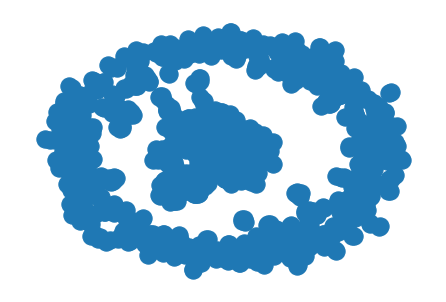

In [41]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [42]:
for component in list(nx.connected_components(G)):
    c += 1
    if len(component)<70:
        for node in component:
            G.remove_node(node)

number of nodes = 689 , number of edges = 772 . number of components = 2


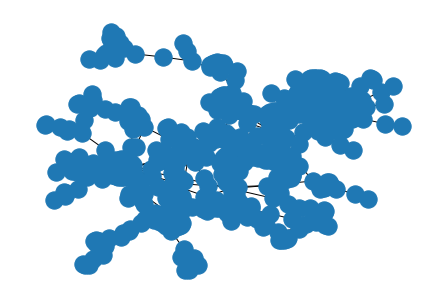

In [44]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [43]:
from matplotlib import pylab
def save_graph(graph, file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(40, 40))
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    
save_graph(G,'g')
print('number of nodes = ', G.number_of_nodes(),
     'number of edges = ', G.number_of_edges())

NameError: name 'plt' is not defined

In [73]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
print(c)

3


In [78]:
G.number_of_nodes()

719